# Let's map some earthquakes!

Use this notebook to complete your final project for unit 4. You'll create a dataframe for the data you downloaded and then plot the earthquakes using latitude and longitude. You'll also create functions to make your code more efficient.

Import the libraries you need here:

In [56]:
# First as always, import the libraries, pandas and matplotlib.
import pandas as pd
import matplotlib.pyplot as plt



Create your data frame:

Try plotting your earthquakes!
Hint: You will need to use the "LATITUDE" and "LONGITUDE" columns

You will also need xlim and ylim to focus the map on your region. Use the following limits:
- North America: xlim = (-180,-50), ylim = (0,90)
- Central America: xlim = (-100,-70), ylim = (0,25)
- South America: xlim = (-120,-20), ylim = (-60,20)
- Africa: xlim = (-25,50), ylim = (-40,45)
- Pacific: xlim = (80,180), ylim = (-70,30)

In [57]:
# Use pandas to read the csv file.
df = pd.read_csv("results - results.csv")

# Isolate the latitude and longitude columns.
lat = df["LATITUDE"]
long = df["LONGITUDE"]
year = df["YEAR"]
magn = df["EQ_PRIMARY"]
deapth= df["FOCAL_DEPTH"]
month = df["MONTH"]

In [58]:
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,2572,NaN,1900,6,7,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2577,NaN,1900,9,18,NaN,NaN,NaN,NaN,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2587,NaN,1901,1,7,0.0,29.0,NaN,25.0,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2658,NaN,1903,8,8,1.0,10.0,NaN,NaN,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6540,Tsu,1903,9,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


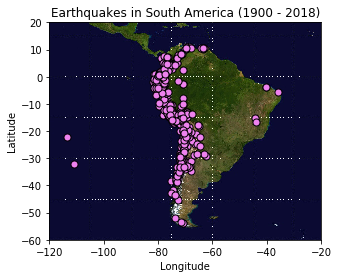

In [59]:
# This is how we put the image behind our scatter plot.
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This is where we use matplotlib to create our color scatter plot.
plt.scatter(long, lat, color = "violet", edgecolor = "black", s=50)

# We title and label our graph here.
plt.title("Earthquakes in South America (1900 - 2018)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# We set our X and Y limits (To show only South America).
plt.xlim(-120,-20)
plt.ylim(-60,20)

# This shows the graph.
plt.show()

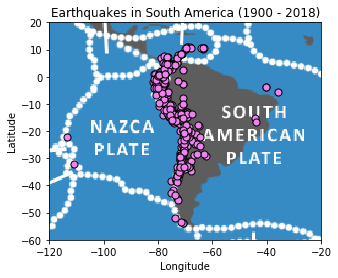

In [60]:
# This is how we put the image behind our scatter plot.
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This is where we use matplotlib to create our color scatter plot.
plt.scatter(long, lat, color = "violet", edgecolor = "black", s=50)

# We title and label our graph here.
plt.title("Earthquakes in South America (1900 - 2018)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# We set our X and Y limits (To show only South America).
plt.xlim(-120,-20)
plt.ylim(-60,20)

# This shows the graph.
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Let's add some color (and functions)
Next, you'll need to color code your points based on one of the characteristics in the data frame. 

First, create a function that takes the name of a column and a number of colors and returns list of intermediate values based on the number of colors you specify (these values will be the boundaries for conditionals later on).

In [61]:
mag = df["EQ_PRIMARY"]

In [62]:
mag_max = (mag.max())
mag_min = (mag.min())
print(mag_max)
print(mag_min)

9.5
4.0


In [63]:
print(mag.max())

9.5


In [64]:
def  function_col (column1, div_num):
    
    column = df[column1]
    
    max_column = column.max()
    min_column = column.min()
    cn = min_column
    
    interval = (max_column - min_column)/div_num
    
    list1 = []
    while len(list1) < div_num:
        cn +=interval  
        list1.append(cn)
    return list1
    

Next, you will make your own version of the colormap we used to color the stars in the astrophysics unit. You will need to make a list that contains a color for each value of the characteristic you have chosen. Think back to the climate change unit for ideas...

You should create a function that takes the name of your characteristic column and a list of RGB value lists and creates a list of values for the "colormap".

Hint: You will need to use the last function you created. You can call this function inside of your new function.

In [65]:
def color_funct(column1, div_num):

    list1 = function_col(column1, div_num)
    
    colors = []
    for item in df[column1]:
        if item <= list1[0]:
            colors.append([249/255, 167/255, 2/255])
        elif item <= list1[1]:
            colors.append([255/255, 93/255, 0/255])
        elif item <= list1[2]:
            colors.append([255/255, 67/255, 0/255])
        elif item <= list1[3]:
            colors.append([255/255, 0/255, 0/255])
        elif item <= list1[4]:
            colors.append([183/255, 0/255, 0/255])
        else:
            colors.append([171/255, 0/255, 0/255])

    return colors
colorlist = color_funct("EQ_PRIMARY", 5)

Next, plot your graph again, adding the argument c = your "colormap" to the scatterplot function:

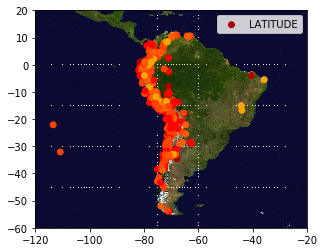

In [79]:
# You will need to run this code again first
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

plt.scatter(long, lat, c = colorlist, s=35)


plt.xlim(-120,-20)
plt.ylim(-60,20)

plt.show()

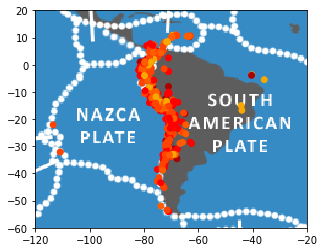

In [67]:
# You will need to run this code again first
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

plt.scatter(long, lat, c = colorlist, s=35)

plt.xlim(-120,-20)
plt.ylim(-60,20)

plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

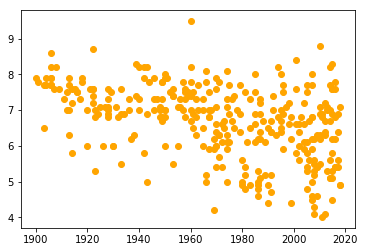

In [68]:
plt.scatter(year, magn, color = "orange")
plt.show()

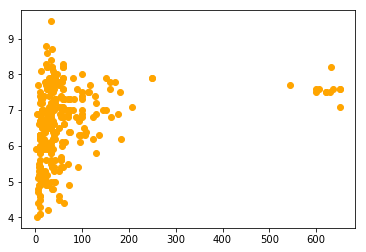

In [69]:
plt.scatter(deapth, magn, color = "orange")
plt.show()

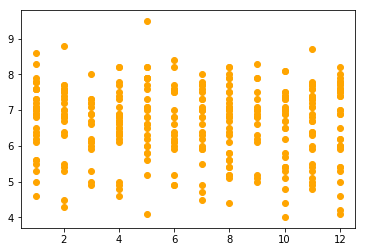

In [70]:
plt.scatter(month, magn, color = "orange")
plt.show()

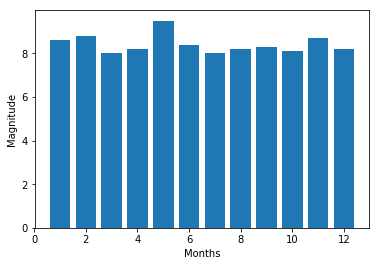

In [71]:
plt.bar(month, magn)
plt.xlabel("Months")
plt.ylabel("Magnitude")
plt.show()

In [72]:
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,2572,NaN,1900,6,7,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2577,NaN,1900,9,18,NaN,NaN,NaN,NaN,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2587,NaN,1901,1,7,0.0,29.0,NaN,25.0,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2658,NaN,1903,8,8,1.0,10.0,NaN,NaN,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6540,Tsu,1903,9,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# We isolated each month using the .loc function.
month1 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 1])
month2 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 2])
month3 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 3])
month4 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 4])
month5 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 5])
month6 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 6])
month7 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 7])
month8 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 8])
month9 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 9])
month10 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 10])
month11 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 11])
month12 = len(df["EQ_PRIMARY"].loc[df["MONTH"] == 12])
# We created a list of all the isolated months.
month_list = [month1, month2, month3, month4, month5, month6, 
              month7, month8, month9, month10, month11, month12]
# This is the list for our bar graph.
list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# This creates the actual graph.
plt.bar(list1, month_list)
plt.xlabel("Month")
plt.ylabel("Amount of Earthquakes")
plt.show()

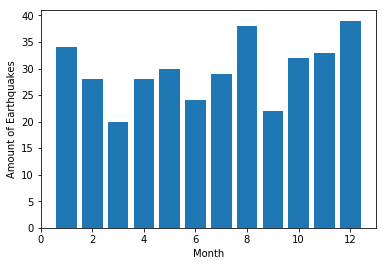

In [83]:
plt.bar(list1, month_list)
plt.xlabel("Month")
plt.ylabel("Amount of Earthquakes")
plt.show()

### Challenge: 
Change the size of your markers based on a second characteristic

In [76]:
def sizescatter(colomn1):
    list1 = function_col(col, 5)
    size = []
    for item in df[column1]:
        if item <= list1[0]:
            size.append(10)
        elif item <= list1[1]:
            size.append(20)
        elif item <= list1[2]:
            size.append(30)
        elif item <= list1[3]:
            size.append(40)
        elif item <= list1[4]:
            size.append(50)
        else:
            size.append(0)
    return size

sizelist = sizescatter("FOCAL_DEPTH")

NameError: name 'col' is not defined

In [ ]:
def color_funct(column1, div_num):

    list1 = function_col(column1, div_num)
    
    colors = []
    for item in df[column1]:
        if item <= list1[0]:
            colors.append([249/255, 167/255, 2/255])
        elif item <= list1[1]:
            colors.append([255/255, 93/255, 0/255])
        elif item <= list1[2]:
            colors.append([255/255, 67/255, 0/255])
        elif item <= list1[3]:
            colors.append([255/255, 0/255, 0/255])
        elif item <= list1[4]:
            colors.append([183/255, 0/255, 0/255])
        else:
            colors.append([171/255, 0/255, 0/255])

    return colors
#colorlist = color_funct("EQ_PRIMARY", 5)

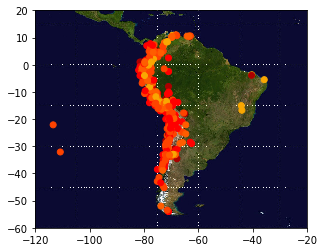

In [78]:
colors = color_funct("EQ_PRIMARY", 5)

image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

plt.scatter(long, lat, c = colors)

plt.xlim(-120,-20)
plt.ylim(-60,20)

plt.show()